In [ ]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
pit = pd.read_csv('/content/Pit_Stop2.csv')
pit

,Year,Team,Driver,LapNumber,Stint,Compound,LapInStint,StintLengthSoFar,LapTime(s),LapTimeDelta,...,StintDegradationSlope,Position,PositionDelta,TrackTemp,AirTemp,Humidity,IsWet,IsSafetyCarLap,IsVSCLap,IsNeutralizedLap
0,2018,Ferrari,VET,2,1,SOFT,1,1,78.447,0.000,...,0.300343,2,0,33.7,25.6,51.4,0,0,0,0
1,2018,Ferrari,VET,3,1,SOFT,2,2,78.088,-0.359,...,0.300343,2,0,33.8,25.8,50.6,1,0,0,0
2,2018,Ferrari,VET,4,1,SOFT,3,3,77.488,-0.600,...,0.300343,2,0,33.9,26.0,50.7,1,0,0,0
3,2018,Ferrari,VET,5,1,SOFT,4,4,77.827,0.339,...,0.300343,2,0,33.9,26.1,50.0,1,0,0,0
4,2018,Ferrari,VET,6,1,SOFT,5,5,77.321,-0.506,...,0.300343,2,0,33.6,26.5,48.9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,2024,McLaren,PIA,74,2,HARD,73,73,76.356,0.075,...,0.000000,2,0,40.5,21.6,61.0,0,0,0,0
3250,2024,McLaren,PIA,75,2,HARD,74,74,76.644,0.288,...,0.000000,2,0,40.8,21.7,61.0,0,0,0,0
3251,2024,McLaren,PIA,76,2,HARD,75,75,76.590,-0.054,...,0.000000,2,0,40.6,21.7,61.0,0,0,0,0
3252,2024,McLaren,PIA,77,2,HARD,76,76,76.734,0.144,...,0.000000,2,0,40.6,21.7,61.0,0,0,0,0


In [12]:
print(pit.info())
print(pit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   3254 non-null   int64  
 1   Team                   3254 non-null   object 
 2   Driver                 3254 non-null   object 
 3   LapNumber              3254 non-null   int64  
 4   Stint                  3254 non-null   int64  
 5   Compound               3254 non-null   object 
 6   LapInStint             3254 non-null   int64  
 7   StintLengthSoFar       3254 non-null   int64  
 8   LapTime(s)             3254 non-null   float64
 9   LapTimeDelta           3254 non-null   float64
 10  AvgLapTimeInStint      3254 non-null   float64
 11  CumulativeTimeInStint  3254 non-null   float64
 12  StintDegradationSlope  3254 non-null   float64
 13  Position               3254 non-null   int64  
 14  PositionDelta          3254 non-null   int64  
 15  Trac


Null Values:
Year                     0
Team                     0
Driver                   0
LapNumber                0
Stint                    0
Compound                 0
LapInStint               0
StintLengthSoFar         0
LapTime(s)               0
LapTimeDelta             0
AvgLapTimeInStint        0
CumulativeTimeInStint    0
StintDegradationSlope    0
Position                 0
PositionDelta            0
TrackTemp                0
AirTemp                  0
Humidity                 0
IsWet                    0
IsSafetyCarLap           0
IsVSCLap                 0
IsNeutralizedLap         0
dtype: int64


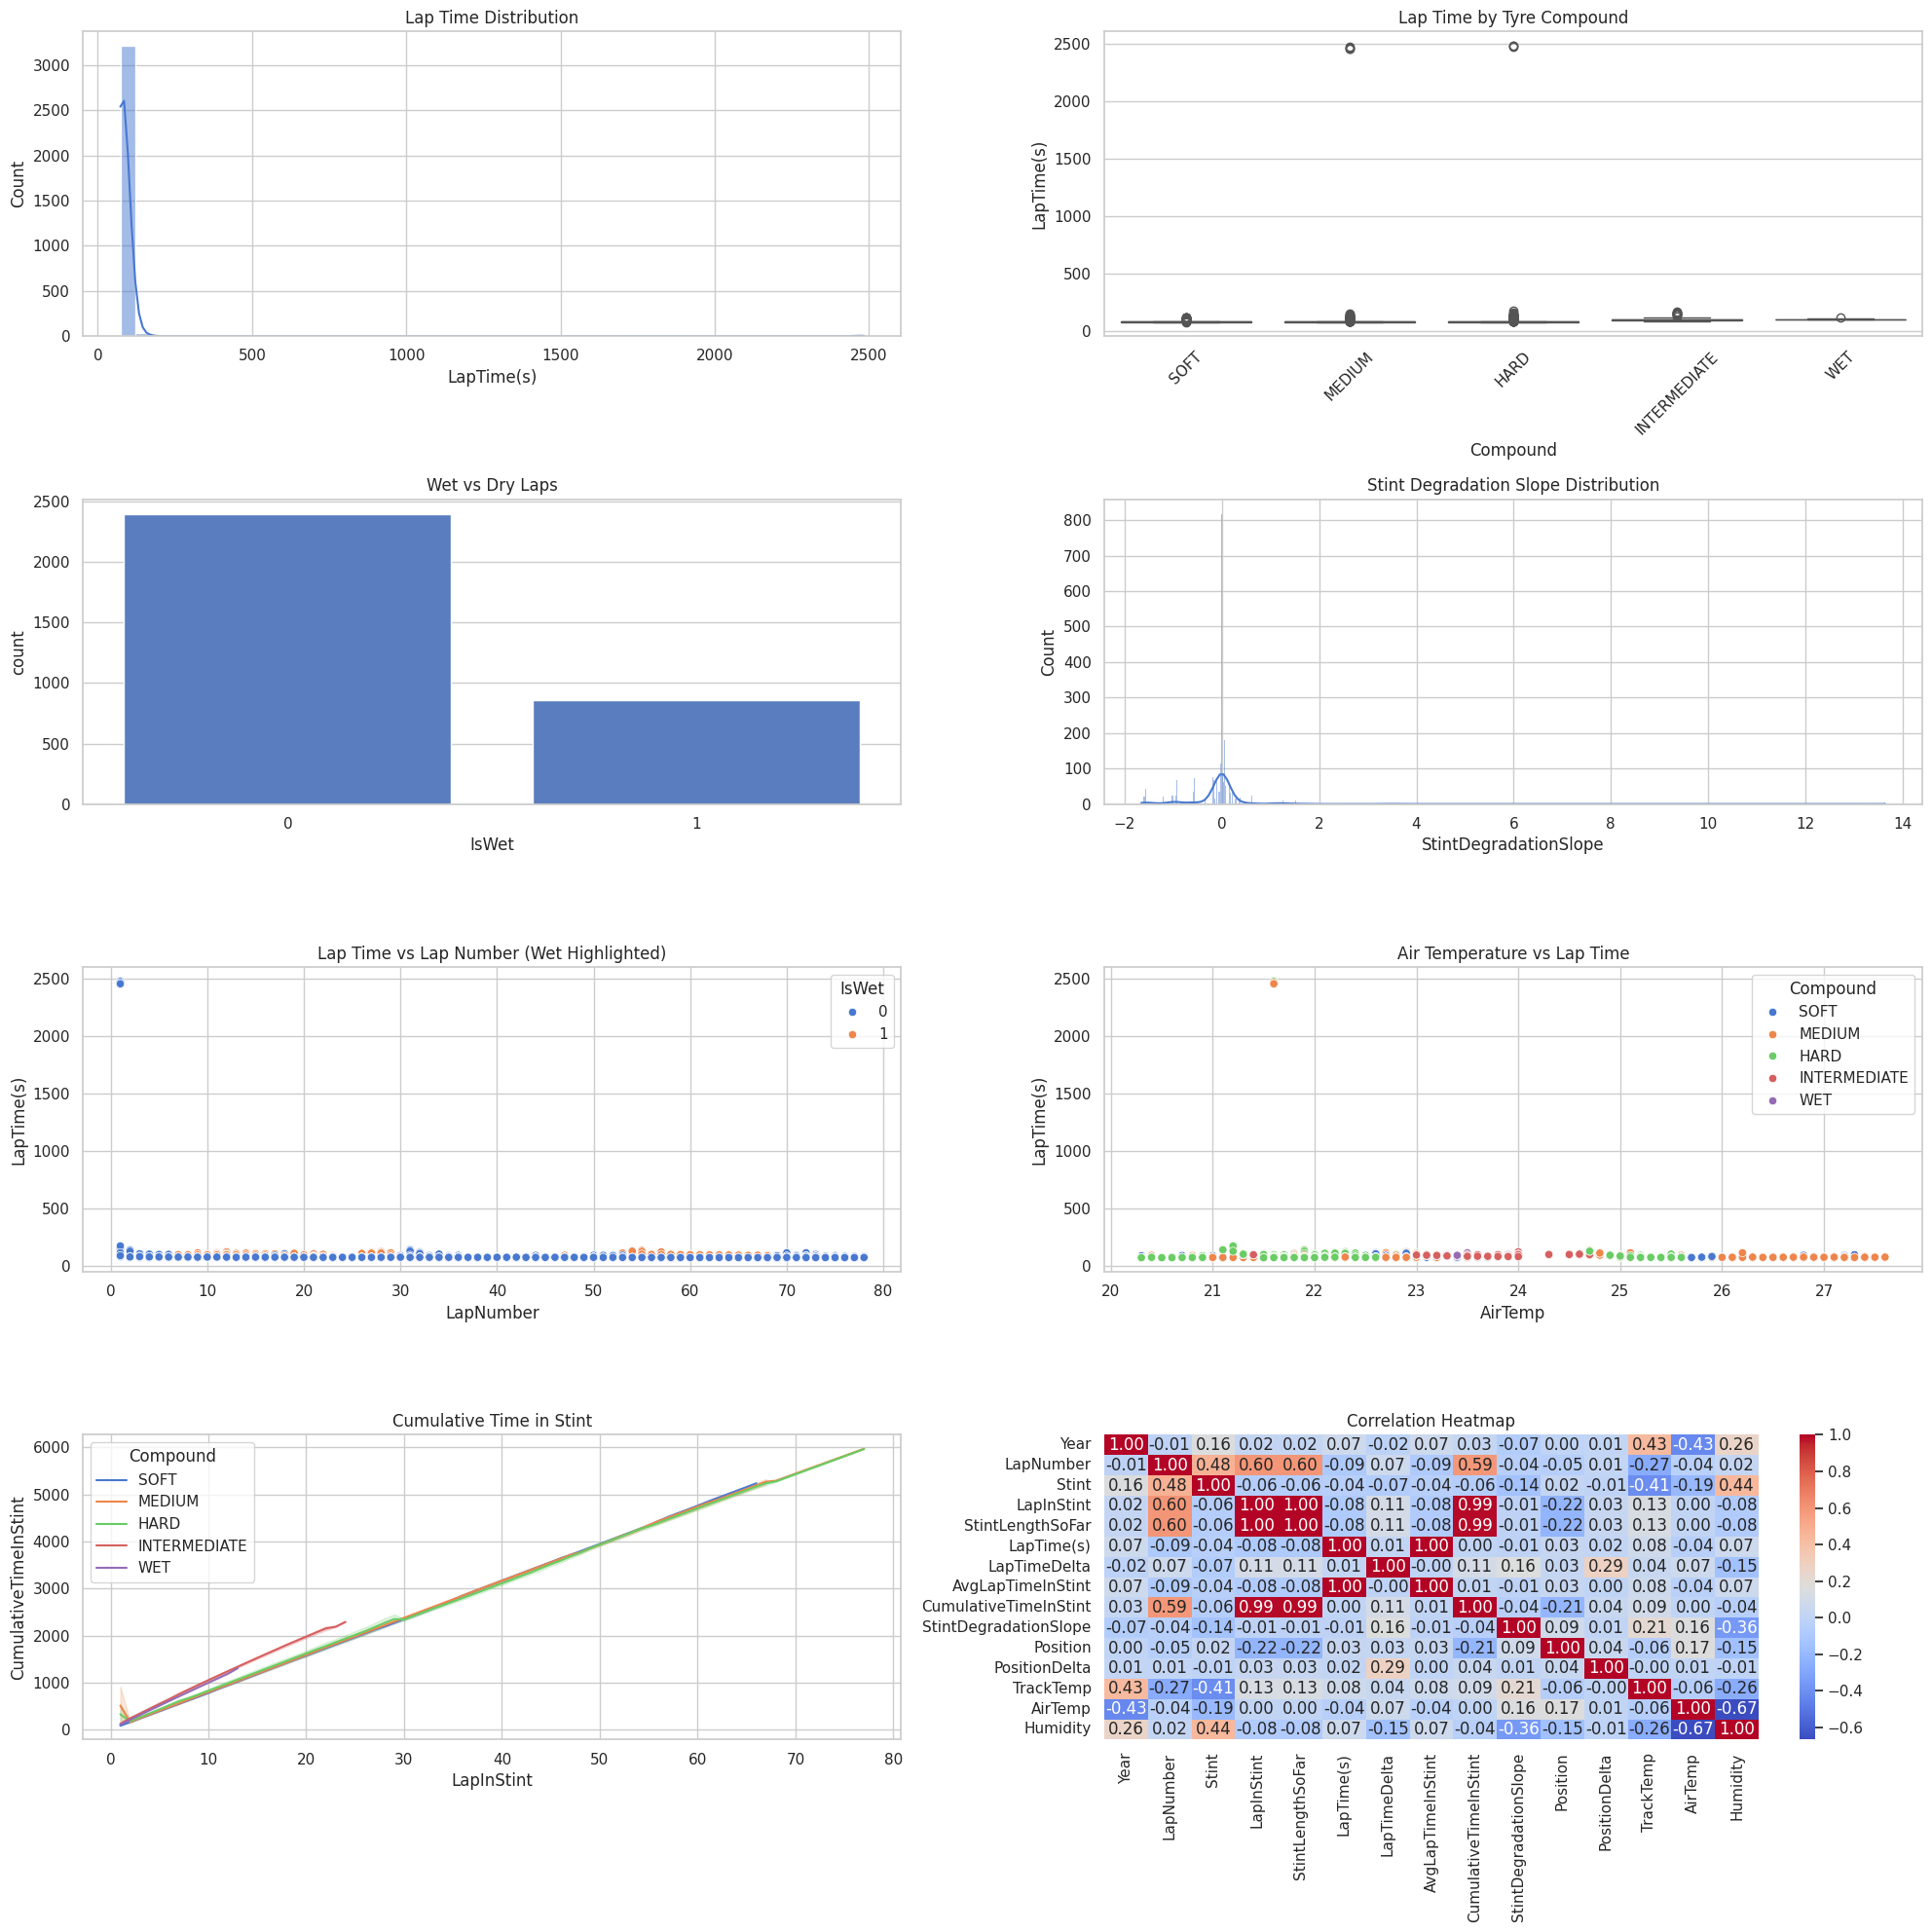

In [18]:
# Null values
print("\nNull Values:")
print(pit.isnull().sum())

# --- Correlation ---
# Select numeric columns for correlation, excluding certain columns
num_cols = pit.select_dtypes(include=['int64', 'float64']).columns.drop(
    ['IsWet', 'IsSafetyCarLap', 'IsVSCLap', 'IsNeutralizedLap']
)
correlation = pit[num_cols].corr()

# --- Plotting ---
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# 1. Lap Time Distribution
sns.histplot(pit["LapTime(s)"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Lap Time Distribution")

# 2. Lap Time by Compound
sns.boxplot(data=pit, x="Compound", y="LapTime(s)", ax=axes[0, 1])
axes[0, 1].set_title("Lap Time by Tyre Compound")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Wet vs Dry Laps
sns.countplot(data=pit, x="IsWet", ax=axes[1, 0])
axes[1, 0].set_title("Wet vs Dry Laps")

# 4. Stint Degradation Slope
sns.histplot(pit["StintDegradationSlope"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Stint Degradation Slope Distribution")

# 5. Lap Time vs Lap Number
sns.scatterplot(data=pit, x="LapNumber", y="LapTime(s)", hue="IsWet", ax=axes[2, 0])
axes[2, 0].set_title("Lap Time vs Lap Number (Wet Highlighted)")

# 6. Air Temperature vs Lap Time
sns.scatterplot(data=pit, x="AirTemp", y="LapTime(s)", hue="Compound", ax=axes[2, 1])
axes[2, 1].set_title("Air Temperature vs Lap Time")

# 7. Cumulative Time in Stint
sns.lineplot(data=pit, x="LapInStint", y="CumulativeTimeInStint", hue="Compound", ax=axes[3, 0])
axes[3, 0].set_title("Cumulative Time in Stint")

# 8. Correlation Heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[3, 1])
axes[3, 1].set_title("Correlation Heatmap")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
